<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#I.-Introduction" data-toc-modified-id="I.-Introduction-1">I. Introduction</a></span></li><li><span><a href="#II.-Implementation-with-video-input" data-toc-modified-id="II.-Implementation-with-video-input-2">II. Implementation with video input</a></span><ul class="toc-item"><li><span><a href="#Software-&amp;-Hardware-Setup" data-toc-modified-id="Software-&amp;-Hardware-Setup-2.1">Software &amp; Hardware Setup</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1.1">Import libraries</a></span></li><li><span><a href="#Thymio-Connection" data-toc-modified-id="Thymio-Connection-2.1.2">Thymio Connection</a></span></li><li><span><a href="#General-Parameters" data-toc-modified-id="General-Parameters-2.1.3">General Parameters</a></span></li></ul></li><li><span><a href="#Method-Overview" data-toc-modified-id="Method-Overview-2.2">Method Overview</a></span></li><li><span><a href="#Global-Map-Setup-&amp;-Construction-via-Image-Processing" data-toc-modified-id="Global-Map-Setup-&amp;-Construction-via-Image-Processing-2.3">Global Map Setup &amp; Construction via Image Processing</a></span><ul class="toc-item"><li><span><a href="#Map-setup" data-toc-modified-id="Map-setup-2.3.1">Map setup</a></span></li><li><span><a href="#Implemetation-details" data-toc-modified-id="Implemetation-details-2.3.2">Implemetation details</a></span></li><li><span><a href="#Parameter-settings" data-toc-modified-id="Parameter-settings-2.3.3">Parameter settings</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2.3.4">Functions</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2.3.5">Examples</a></span></li></ul></li><li><span><a href="#Global-Planning" data-toc-modified-id="Global-Planning-2.4">Global Planning</a></span><ul class="toc-item"><li><span><a href="#Implemetation-details" data-toc-modified-id="Implemetation-details-2.4.1">Implemetation details</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2.4.2">Functions</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2.4.3">Examples</a></span></li></ul></li><li><span><a href="#Global-Control" data-toc-modified-id="Global-Control-2.5">Global Control</a></span><ul class="toc-item"><li><span><a href="#Implemetation-details" data-toc-modified-id="Implemetation-details-2.5.1">Implemetation details</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2.5.2">Parameters</a></span></li><li><span><a href="#Function" data-toc-modified-id="Function-2.5.3">Function</a></span></li></ul></li><li><span><a href="#Local-Navigation" data-toc-modified-id="Local-Navigation-2.6">Local Navigation</a></span><ul class="toc-item"><li><span><a href="#Implemetation-details" data-toc-modified-id="Implemetation-details-2.6.1">Implemetation details</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2.6.2">Parameters</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2.6.3">Functions</a></span></li></ul></li><li><span><a href="#Overall-Implementation" data-toc-modified-id="Overall-Implementation-2.7">Overall Implementation</a></span></li></ul></li><li><span><a href="#III.-Implementation-without-video-input" data-toc-modified-id="III.-Implementation-without-video-input-3">III. Implementation without video input</a></span><ul class="toc-item"><li><span><a href="#Method-Overview" data-toc-modified-id="Method-Overview-3.1">Method Overview</a></span></li><li><span><a href="#Basic-Setup" data-toc-modified-id="Basic-Setup-3.2">Basic Setup</a></span></li><li><span><a href="#Navigation-with-Kalman-Filtering" data-toc-modified-id="Navigation-with-Kalman-Filtering-3.3">Navigation with Kalman Filtering</a></span></li><li><span><a href="#Global-Map-Setup" data-toc-modified-id="Global-Map-Setup-3.4">Global Map Setup</a></span></li><li><span><a href="#Towards-the-goal" data-toc-modified-id="Towards-the-goal-3.5">Towards the goal</a></span><ul class="toc-item"><li><span><a href="#Test-case1" data-toc-modified-id="Test-case1-3.5.1">Test case1</a></span></li><li><span><a href="#Test-case2" data-toc-modified-id="Test-case2-3.5.2">Test case2</a></span></li><li><span><a href="#Test-case3" data-toc-modified-id="Test-case3-3.5.3">Test case3</a></span></li></ul></li></ul></li><li><span><a href="#IV.-Reference" data-toc-modified-id="IV.-Reference-4">IV. Reference</a></span></li></ul></div>

# Final Project - Basics of Mobile Robotics

**Students: Chuanfang Ning, Jianhao Zheng, Ju Wu, Yujie He**

(Names in alphabetical order)

## I. Introduction

This project aims to combine vision, path planning, local navigation, and filtering to maneuver a Thymio robot on a map towards a goal. We have realized two types of implementations, i.e., vision-guided and vision-free version.

For the former implementation, the image of the experimental site is first captured by the webcam. The necessary map information, including the robot pose, map, static obstacles, and the goal position, is extracted in a real-time fashion by utilizing the classic image processing techniques. Afterward, the A* algorithm computes the optimal path. It sends the instructions for the global controller of the Thymio robot, which gives instructions to the motors to follow the optimal path. If Thymio detects an obstacle ahead via the horizontal proximity sensors, local navigation will take over the robot's movement to avoid collisions. Also, one can kidnap the Thymio robot, it can still find the way to the goal position.

For the latter, the overall scene is simplified by manually selecting the start and goal positions. Afterward, A* is similarly used for optimal path calculation and the associated control command output. After that, the robot walks along the path while the Kalman filter performs position estimation at a certain frequency.

**For more information, the demo video is available [here](https://drive.google.com/file/d/1wbtolQur5SVBcemI5H8u9ayeaPjNCPrn/view).**

## II. Implementation with video input

### Software & Hardware Setup

#### Import libraries

In [1]:
import os
import sys
import time
import serial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
import time
import serial
import tqdm
import scipy
import vision_func
import cv2
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))
# Thymio Python bridge
from Thymio import Thymio
# for visualization
from viz_utilis import plotPath

#### Thymio Connection

In [2]:
# By Cable
#th = Thymio.serial(port="COM4", refreshing_rate=0.1)
# By Wireless
th = Thymio.serial(port="\\.\COM5", refreshing_rate=0.1)
#dir(th)

#### General Parameters

In [2]:
pi = math.pi

### Method Overview

**Requirement:**
In the vision-guided version, Thymio should navigate from any possible start position to any reachable end position in a webcam-supervised arena with various obstacles. During the motion, new obstacles are added to test the local navigation and replanning. The robot can also recover from the kidnap.

**Final implementation:**
Thymio will first read a global map from processed images obtained from the webcam. The global navigation is based on the A* algorithm. If unexpected obstacles are detected in the planned path, local avoidance is triggered to avoid the obstacle ahead via horizontal proximity sensors and send a replanning flag. Likewise, a replanning flag is also issued to recalculate the optimal path if the robot detects the kidnap via ground proximity sensors.

![](./img/VGV_Workflow.png)

### Global Map Setup & Construction via Image Processing

#### Map setup

To simulate an environment with walls in which Thymio will roam around. We use a drawer with a maximum size of 1000x600 mm for the robot arena. As obstacles, we selected an empty beverage box folded with red-colored paper, which will be easier to recognize in the image processing.Besides, the webcam is fixed at a distance of 1m from the ground

In this part, Wireless Thymio is connected to the computer via the dongles.

![](./img/with_Small.png)

#### Implemetation details

The vision method is strongly dependent on the map data, which can be updated continuously from the video. The construction of a global map consists of the following steps:

1. The raw images are sampled at a given frequency from the webcam.
2. The raw images are calibrated using a camera matrix and transformed using the four corner marks in the arena.
3. Multiple color masks are applied to the transformed image to distinguish the target position, thymio (front and rear) and obstacles.
4. The obstacle mask is dilated and rasterized to provide a grid-wise occupancy map for the A* algorithm.
5. The obtained occupancy map and starting-end pose are saved and updated with a given frequency.

**Note:** The global map construction is running independently and simultaneously with other modules that control the Thymio. It will always try to update the map to the latest. If the map is not recognizable (interference of humans like putting a hand over Thymio), the global map will not be updated. The last successfully constructed map will be passed into path planning.

- **Hardware**

    Our group uses the "Trust Spotlight Pro" webcam. For more details, please refer to https://www.digitec.ch/de/s1/product/trust-spotlight-pro-130mpx-webcam-5707237.
    
| Hardware                | Parameters                                                      | Image | 
| :------------------- | :------------------------------------------------------------ | :----------- | 
| ["Trust Spotlight Pro" webcam](https://www.digitec.ch/de/s1/product/trust-spotlight-pro-130mpx-webcam-5707237)   | **Connection**: USB <br> **Pixel resolution**: 1280 x 1024 pixels <br> **Refresh rate**: 30FPS | ![](https://static.digitecgalaxus.ch/Files/1/9/7/8/0/6/0/3/16428_pictures_product_visual_1.png?impolicy=ProductTileImage&resizeWidth=436&resizeHeight=335&quality=high&cropWidth=436&cropHeight=335)         | 


- **Input**

    - Raw image captured from camera
    - Grid size to be used for robot movement (for A* algorithm)
    - Color HSV values that helps define the map (this is sensitive to light and needs to be calibrated after setting environment)

- **Output**

    - Global map in the form of npy array that marks all occupancy with 1 and vacanncy with 0
    - Starting pose and end position of the Thymio in the form of npy

- **Limitations**

    - The color masks are rather sensitive to lighting conditions and hyperparameters need to be calibrated each time when the environment is setup.

- **Key parameters**

    - Related to algorithms

| Name                | Meaning                                                      | Type |
| :------------------ | :----------------------------------------------------------- | :--- |
| `mtx`               | Camera matrix of the calibrated webcam                       | Float array (3x3)|
| `dist`              | Distortion coefficients of the calibrated webcam             | Float array (1x5)|
| `real_height`       | Height of the arena between 2 markers (default 56 cm)| Int |
| `real_width`        | Width of the arena between 2 markers (default 80 cm)| Int |
| `COLOR_lower`       | Lower HSV threshold of the COLOR mask | Int Array (1x3) |
| `COLOR_upper`       | Upper HSV threshold of the COLOR mask | Int Array (1x3) |
| `time_interval`     | Time interval between the updates of captured img            | Float |
| `ext_pixels`        | Dilation pixels of the obstacles (Measured : 7 pixels = 1 cm) | Float |
| `offset_thymio`     | Offset of the rotation center of Thymio to the vision identified center | Tuple |
| `grid_size`         | Size of the rasterizing grid (default 4 cm) | Int |
| `grid_array_output` | Rasterzied occupancy map with 1 for occupied and 0 for vacnt | Int array (nxn)|
| `grid_array_start`  | Coordinate of Thymio start point in the rasterized map | Tuple |
| `grid_array_end`    | Coordinate of Thymio end point in the rasterized map | Tuple |
| `start_direction`   | Direction vector of Thymio (coordinate same as image coordinate) | Tuple |

- Color mask table

| Color     | Used for    | Lower bounds (default) | Upper bounds (default) |
| :---------| :--------   | :----------- | :----------- |
| `pink`    | 4 Corner markers of arena | [100, 95, 110] | [150, 155, 200]|
| `yellow`  | End position of Thymio    | [85, 100, 170] | [120, 125, 210]|
| `red `    | Obstacles                 | [100, 130, 145]| [132, 170, 200]|
| `orange`  | Obstacles (back up)       | [95, 124, 165] | [115, 175, 205]|
| `green`   | front of Thymio           | [30, 130, 90]  | [60, 175, 120] |
| `blue`    | rear of Thymio            | [15, 180, 110] | [25, 230, 155] |

#### Parameter settings

In [14]:
offset_thymio = (9, 25) #pixel offset of Thymio to the center position (turning axis)
ext_pixels = 42  # Dilate diameter of obstacles where 42 pixel equals 6 cm in the given scene setting
grid_size = 4 #cm size of grid
real_height = 56 #cm size of arena
real_width = 80 #cm size of arena
#All bondaries for color map is saved in vision_func.py

#### Functions

| Function | Input | Output |
|------|------|------|
|   transform_img  | (Raw image from camera) | (Transformed image with only the zone of arena)
|   color_mask  | (Transformed image) | (Raw obstacle mask, Thymio start, Thymio target, Thymio pose)
|   dilate_obstacle  | (Raw obstacle mask, dilate diameter in pixel) | (Obstacle mask dilated with the Thymio radius and corrected with the walls(drawer bounds))
|   rasterize  | (Dilated obstacle mask, arena width, arena height, grid size, start point,target point) | (Grided obstacle map, grided starting point, grided target point)

#### Examples

Text(0.5, 1.0, 'Calibrated raw image from webcam')

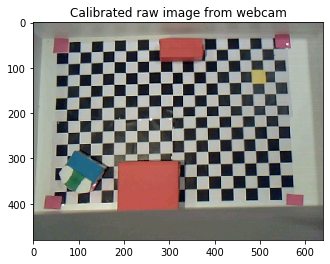

In [13]:
example_raw_img = cv2.imread("example_raw.jpg")
plt.imshow(cv2.cvtColor(example_raw_img, cv2.COLOR_BGR2RGB))
plt.title('Calibrated raw image from webcam')

Text(0.5, 1.0, 'Transformed image')

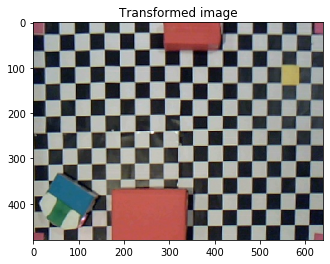

In [8]:
warped_img = vision_func.transform_img(example_raw_img)
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.title('Transformed image')

startpoint at (423, 80), endpoint at (116, 568), direction vector is (39, -24)


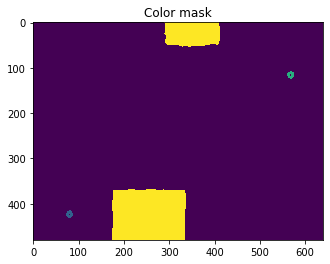

In [10]:
[obstacles_mask,start_point,end_point,start_direction] = vision_func.color_mask(warped_img,offset_thymio)

temp = obstacles_mask.copy()
temp = cv2.circle(temp, (start_point[1],start_point[0]), 5, (80,0,0), 5)
temp = cv2.circle(temp, (end_point[1],end_point[0]), 5, (160,0,0), 5)
plt.imshow(temp)
plt.title('Color mask')
print(f'startpoint at {start_point}, endpoint at {end_point}, direction vector is {start_direction}')

Text(0.5, 1.0, 'Dilated obstacle map')

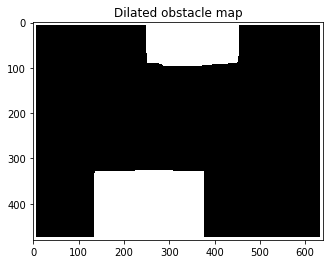

In [11]:
obstacles_mask_dilated = vision_func.dilate_obstacle(obstacles_mask,ext_pixels)
plt.imshow(obstacles_mask_dilated,cmap = 'gray')
plt.title('Dilated obstacle map')

grid_start point at (12, 2), grid_end_point at (3, 17)


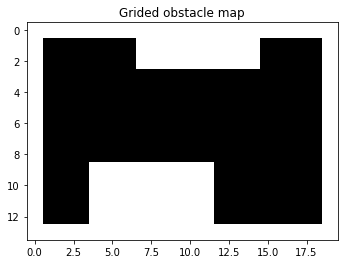

In [12]:
[grid_output,grid_array_output,grid_array_start,grid_array_end] = vision_func.rasterize(obstacles_mask_dilated,real_width,real_height,grid_size,start_point,end_point)
plt.imshow(grid_array_output, cmap = "gray")
plt.title('Grided obstacle map')
print(f'grid_start point at {grid_array_start}, grid_end_point at {grid_array_end}')

### Global Planning

#### Implemetation details

A* algorithm is used for global planning in this project. For convenience when implementing filter, only four movements are possible, which is respectively (1,0), (-1,0), (0,1), (0,-1). Knowing the start point, the goal point and the whole map, the algorithm can then compute the optimal path to reach the destination.

- **Input**

    - **start** : a tuple contains the coordinates of start point (e.g. (11, 21))
    - **goal** : a tuple contains the coordinates of goal point (e.g. (4, 34))
    - **occupancy_grid** : an array contains the information of our map
    - **Height** : the max X value a grid can take. In practice, it means the number of grids along the North and South direction
    - **Len** : the max Y value a grid can take. In practice, it means the number of grids along the East and West direction
              


- **Output**

    - **optimal_path** : a list of tuples containing the coordinates of all points along the optimal path
    - **control_guide** : a list of tuples containing which direction to move along the optimal path. Only four directions is included in this function. (1,0) means moving South, (0,1) means moving East and so on.

- **Limitations**

    - The time complexity of the A* algorithm depends on the heuristic and is nonlinear. Thus, it brings a heavy computational burden if the start point is far from the goal point. In our experiment, the total size of the grid size is small ( 14 x 20 ). So, the algorithm can work fine. However, the worst running time is 41s for larger sizes (60 x 100).
    - Only four possible directions are available for convenience when implementing a filter. This limitation could be improved by adjusting the variable **movements** defined in the function. 

#### Functions

In [3]:
def A_Star_4_direction(start, goal, occupancy_grid, Height, Len):
    
    # List of all coordinates in the grid
    x,y = np.mgrid[0:Height:1, 0:Len:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    pos = np.reshape(pos, (x.shape[0]*x.shape[1], 2))
    coords = list([(int(x[0]), int(x[1])) for x in pos])
    
    # Define the heuristic, distance to goal ignoring obstacles
    h = np.linalg.norm(pos - goal, axis=-1)
    h = dict(zip(coords, h))

    # Check if the points are inside the map
    for point in [start, goal]:
        assert point[0]>=0 and point[1]>=0 and point[0]<Height and point[1]<Len, "start or end goal not contained in the map"
    
    # Check if the points are in the free spaces
    if occupancy_grid[start[0], start[1]]:
        raise Exception('Start node is not traversable')

    if occupancy_grid[goal[0], goal[1]]:
        raise Exception('Goal node is not traversable')
    
    # define the four possible movements
    s2 = math.sqrt(2)
    movements = [(1, 0, 1.0),
            (0, 1, 1.0),
            (-1, 0, 1.0),
            (0, -1, 1.0)]
    
    # The set of visited nodes that need to be expanded.
    # Initially, only the start node is known.
    openSet = [start]
    
    # The set of visited nodes that no longer need to be expanded.
    # It contains the list of variables that have already been visited 
    closedSet = []

    # For node n, cameFrom[n] is the node immediately preceding it on the cheapest path from start to n currently known.
    cameFrom = dict()

    # For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    gScore[start] = 0

    # For node n, fScore[n] := gScore[n] + h(n). 
    fScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    fScore[start] = h[start]

    
    while len(openSet)!=0: 
        
        #find the unvisited node having the lowest fScore[] value
        fScore_openSet = {key:val for (key,val) in fScore.items() if key in openSet}
        current = min(fScore_openSet, key=fScore_openSet.get)
        del fScore_openSet
        
        #If the goal is reached, reconstruct and return the obtained path and control guide
        if current == goal:
            optimal_path = [current]
            control_guide = []
            while current != start:
                previous=current
                current=cameFrom[current]
                optimal_path.insert(0,current)
                control_guide.insert(0,(previous[0]-current[0],previous[1]-current[1]))
            return optimal_path, control_guide
                
        
        openSet.remove(current)
        closedSet.append(current)

        # If the goal was not reached, search for each neighbor of current:
        for dx, dy, deltacost in movements: 
            neighbor = (current[0]+dx, current[1]+dy)
            # if the node is not in the map, skip
            if (neighbor[0] >= Height) or (neighbor[1] >= Len) or (neighbor[0] < 0) or (neighbor[1] < 0):
                continue
            
            # if the node is occupied or has already been visited, skip
            if (occupancy_grid[neighbor[0], neighbor[1]]) or (neighbor in closedSet):
                continue
            
            # compute the cost to reach the node through the given path
            tentative_gScore = deltacost + gScore[current] 
            
            # Add the neighbor list of nodes who's neighbors need to be visited
            if neighbor not in openSet:
                openSet.append(neighbor)
            
            # If the computed cost is the best one for that node, then update the costs and 
            # node from which it came
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + h[neighbor]

    # Open set is empty but goal was never reached
    print("No path found to goal")
    return [], [] 

#### Examples

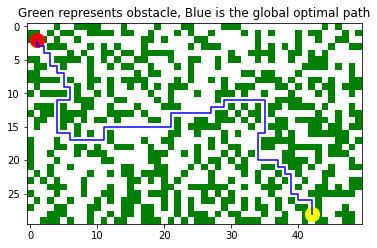

In [4]:
h_eg = 50
w_eg = 30

np.random.seed(0)
generate_eg = np.random.rand(h_eg,w_eg) * 20

limit = 12
map_eg = generate_eg.copy()
map_eg[generate_eg>limit] = 1
map_eg[generate_eg<=limit] = 0
plt.imshow(map_eg.transpose(),cmap=colors.ListedColormap(['white', 'green']))

start_eg = (1,2)
goal_eg = (42,28)

path_eg, control_guide_eg = A_Star_4_direction(start_eg, goal_eg, map_eg, h_eg,w_eg)
path_eg = np.array(path_eg).reshape(-1, 2).transpose()

plt.plot(path_eg[0], path_eg[1], color = 'blue');
plt.scatter(start_eg[0], start_eg[1], marker="o", color = 'red', s=200);
plt.scatter(goal_eg[0], goal_eg[1], marker="o", color = 'yellow', s=200);
plt.title("Green represents obstacle, Blue is the global optimal path");

### Global Control

#### Implemetation details

Function **global_controller_withvision** controls Thymio to move along the global optimal path obtained by function **A_Star_4_direction**. When the difference between the current angle of Thymio and that of the planned one, it will rotate to the correct direction. 

- **Input**

    - **control_guide** : one of the outputs of A* algorithm ( a list of tuple)
    - **curr_ang** : a float meaning the current angle of Thymio
    - **idx** : an int telling Thymio which step of the global optimal path to take. e.g. If idx = 3 and control_guide[3] = (0,1), Thymio will go along (0,1) and move across one grid


- **Limitations**

    - Very sensitive to the accuracy of the current angle obtained by the camera. If the camera is not precise enough, Thymio will rotate to a wrong direction.
    - Without filter here, the global controller do not realize it even if Thymio deviates from the supposed path. Thus, some kind of closed-loop control is applied in the **Overall Implementation**.


- **Key parameters**

| Name             | Meaning                                       | Type (Unit) | Global |
| :--------------- | :-------------------------------------------- | :---------- | :----- |
| forward_duration | Time duration for moving forward              | Int         | Yes    |
| run_speed        | Speed of the wheels when moving forward       | Int         | Yes    |
| run_offset       | Offset for the difference speed of two wheels | Int         | Yes    |
| rot_duration     | Time duration for rotating                    | Float       | Yes    |
| rot_speed        | Speed of the wheels when rotating             | Int         | Yes    |
| basic_moves      | Four possible movements of Thymio             | List        | No     |
| basic_orients    | Orient of each movement in **basic_moves**   | List        | No     |
| basic_angle      | Angle of each movement in **basic_moves**     | List        | No     |


#### Parameters

In [4]:
# translation
forward_duration = 1
run_speed=118
run_offset=0

# rotation
rot_duration = 1.2
rot_speed = 125

# coordinate settings
basic_moves= [(-1, 0),(0,-1),(1,0),(0,1)]
basic_orients= ['North','West','South','East']
basic_angle= [pi,-0.5*pi,0,0.5*pi]

#### Function

- Basic components

In [5]:
########## orient calibrate with initial camera image
def orient_calibrate(initial_orient,state_orient):
    diff=state_orient-initial_orient
    if diff>0:
        turnleft(diff)
    else:
        turnright(-diff)
    stopmotors()

## Basic motion function
def stepforward(forward_t):
    th.set_var("motor.left.target", run_speed + lw_offset)
    th.set_var("motor.right.target", run_speed + rw_offset)
    time.sleep(forward_t)
    stopmotors()

def turnleft(diff_orient):
    th.set_var("motor.left.target", 2**16-rot_speed)
    th.set_var("motor.right.target", rot_speed)
    time.sleep(diff_orient*rot_duration)
    stopmotors()

def turnright(diff_orient):
    th.set_var("motor.left.target", rot_speed)
    th.set_var("motor.right.target", 2**16-rot_speed)
    time.sleep(diff_orient*rot_duration)
    stopmotors()
    
def stopmotors():
    th.set_var("motor.left.target", 0)
    th.set_var("motor.right.target", 0)
    
def regulateAng(ang):
    if ang > math.pi:
        return ang - 2 * math.pi
    elif ang < -pi:
        return ang + 2 * math.pi
    else:
        return ang

- global controller

In [1]:
#################
#global controller
def global_controller_withvision(control_guide, curr_ang, idx):
    move_seq=dict(zip(basic_moves, basic_orients))
    ang_seq=dict(zip(basic_moves, basic_angle))
    ctr_seq=[]
    for i in control_guide:
        i=tuple(i)
        ctr_seq.insert(len(ctr_seq),i)
    print("Next step ({}): {}".format(idx, ctr_seq[idx]))
    cr_move=move_seq[ctr_seq[idx]]
    dir_move=ang_seq[ctr_seq[idx]]
    #print("dir_move", dir_move)
    #print("curr_ang", curr_ang)
    diff_orient=curr_ang-dir_move
    diff_orient = regulateAng(diff_orient)
    print(diff_orient)
    # correct angle
    if abs(diff_orient)>(pi/36):
        if diff_orient<0:
            print("Correct angle: turn left")
            turnleft(-diff_orient)
        else:
            print("Correct angle: turn right")
            turnright(diff_orient)
    
    stepforward(forward_duration)

### Local Navigation

#### Implemetation details

Thymio needs to avoid unexpected obstacles by initial video input. Therefore, the five front horizontal proximity sensors can detect the unknown object in front of itself. The objective is to bypass the unknown local obstacle for further replanning an optimal path towards the goal.

- **Input**

    - Horizontal proximity sensor values
    - (Optional) Thymio robot orient


- **Output**

    - Motion control command for robot translation and rotation

- **Limitations**

    - The physical obstacles color should be red to have an optimal detection for the chosen hyperparameters.
    - The fixed amount of time is challenging to set without prior knowledge of the obstacle's size. If it's too short, the robot will take a lot of time to avoid the obstacle as it needs to repeat multiple cycles to get out of the local navigation. In contrast, Thymio may move away from the pre-calculated optimal path if it's long.

- **Key parameters**

| Name                | Meaning                                                      | Type (Unit) | Global |
| :------------------- | :------------------------------------------------------------ | :----------- | :------ |
| `threshold_obst`     | Thresholds for determining obstacles ahead                   | Int         | Yes    |
| `threshold_loc`      | Thresholds for determining obstacles locally                 | Int         | No     |
| `local_motor_speed` | initial orient from measurement of camera                    | Int         | Yes    |
| `direction`         | the orient of robot during local navigation (E: 1; N: 2; W: 3; S: 4) | Int | No     |

#### Parameters

In [8]:
## Parameters for local navigation
threshold_obst = 3500 
threshold_loc = 2500
local_motor_speed = 100
threshold_obst_list = [3200, 3600, 3600, 3600, 3200]

#### Functions

In [9]:
def motor_forward(motor_speed):
    th.set_var("motor.left.target", motor_speed)
    th.set_var("motor.right.target", motor_speed)

def local_navigation(sens, threshold_loc, local_motor_speed):
    """
    Input: 
        sens
        threshold_loc
        local_motor_speed
    Output:
        ACTION
    """
    
    # follow the obstacle by the left
    if (sens[0]+sens[1]) > (sens[4]+sens[3]) :
        bypass('right',sens, threshold_loc,local_motor_speed)
        
    # follow the obstacle by the right    
    else :
        bypass('left',sens, threshold_loc,local_motor_speed)
    
def bypass(leftright, sens,threshold_loc,local_motor_speed):
    if leftright == "right":
        while sum(sens[i] > threshold_loc for i in range(0,5)) > 0:
            print("Turn right")
            turnright(pi/2)
            sens = th["prox.horizontal"]
        while th["prox.horizontal"][0] > threshold_loc:
            motor_forward(local_motor_speed)
            time.sleep(0.2)
    elif leftright == "left":
        while sum(sens[i] > threshold_loc for i in range(0,5)) > 0:
            print("Turn left")
            turnleft(pi/2)
            sens = th["prox.horizontal"]
        while th["prox.horizontal"][4] > threshold_loc:
            motor_forward(local_motor_speed)
            time.sleep(0.2)
    motor_forward(local_motor_speed)
    time.sleep(2)
    stopmotors()

### Overall Implementation

- Real-time processing from webcam

   Due to the characteristics of the notebook, the following code will run separately

In [1]:
# with open('undist_params.p', 'rb') as f:  # calibrating matrix
#     x = pickle.load(f)
#     mtx = x['mtx']
#     dist = x['dist']
#     time_interval = 0.5 # updating frequency
#     # read the raw image of camera
#     cap = cv2.VideoCapture(1)
#     time.sleep(1)  # wait for the webcam to initialize
#     ret, frame = cap.read()
    
#     while (1):  # loop
#         sleep(time_interval)
#         try:
#             ret, frame = cap.read()
#             frame = cv2.undistort(frame, mtx, dist, None, mtx)
#             ###other IP functions and map exporting
#             ###get grid_array_start, start_direction, grid_array_end and grid_array_output
#             with open('./npy/points.npy', 'wb') as f:
#                 np.save(f, [grid_array_start,start_direction,grid_array_end])
#             with open('./npy/global_map.npy', 'wb') as f:
#                 np.save(f, grid_array_output)
#         except Exception as e:
#             print(e)"

- Map info reading

In [ ]:
%matplotlib inline
move_seq=dict(zip(basic_moves, basic_orients))
ang_seq=dict(zip(basic_moves, basic_angle))
h_v_flag = 1 # 
globalmap = np.load("./npy/global_map.npy")
state_array = np.load("./npy/points.npy")
curr_pos = (state_array[0,0],state_array[0,1])
ang_vec = state_array[1]
curr_ang = math.atan2(ang_vec[1],ang_vec[0]) # convert to degree by curr_ang * 180 / pi
goal = (state_array[2,0],state_array[2,1])
start = curr_pos
plt.imshow(globalmap)

- planning the path & visualization

In [ ]:
%matplotlib inline
h = globalmap.shape[0]
w = globalmap.shape[1]
#h, w = globalmap.shape()
path, control_guide = A_Star_4_direction(curr_pos, goal, globalmap, h, w)
idx = 0
replan_flag = 0
EVA = 1
C_period = 3

experi_name = "Local_final"
plotPath(path, w, h, experi_name, save_flag=False)

- Towards goal!

In [ ]:
while abs(curr_pos[0] - goal[0]) + abs(curr_pos[1] - goal[1]) > EVA:
    
    # Check if thymio is kidnapped
    g_sens=th["prox.ground.reflected"]
    if sum([int(ele < 10) for ele in g_sens]) == 2:
        print("have been kidnapped")
        replan_flag = 1
        time.sleep(8)
        continue
    
    # Update current state
    state_array = np.load("./npy/points.npy")
    curr_pos = (state_array[0,0],state_array[0,1])
    print(curr_pos)
    ang_vec = state_array[1]
    #curr_ang = math.atan2(-ang_vec[0], ang_vec[1])
    curr_ang = math.atan2(ang_vec[1],ang_vec[0])
    
    # Check if thymio is in the right position every `C_period` steps
    if idx % C_period == C_period-1 and (abs(path[idx][0]-curr_pos[0])>1 or abs(path[idx][0]-curr_pos[0])>1):
        print("Deviate from planned path. Replan!")
        print(path[idx])
        print(curr_pos)
        stopmotors()
        replan_flag = 1
    
    # Replan the path
    if replan_flag:
        print("Re-calculated the optimal path")
        # reread global map
        globalmap = np.load("./npy/global_map.npy")
        path, control_guide = A_Star_4_direction(curr_pos, goal, globalmap, h, w)
        #cmap_name = 'gray_r'
        #plotPath(path, w, h, True, cmap=plt.get_cmap(cmap_name))
        plotPath(path, w, h, experi_name, save_flag=True)
        plt.imshow(globalmap)
        replan_flag = 0
        idx = 0
          
    # Check if encontered obstacle
    sens = th["prox.horizontal"]
    
    # Check if should be in local or global navigation
    if idx > 0:
        print("Current pos", curr_pos)
        if (globalmap[2*path[idx][0]-path[idx-1][0],2*path[idx][1]-path[idx-1][1]] == 0) and 
            ([path[idx+1][0]-path[idx][0], path[idx+1][1]-path[idx][1]] == [path[idx][0]-path[idx-1][0], path[idx][1]-path[idx-1][1]]):
            print("Next is empty")
            if (sum([sens[i] > threshold_loc[i] for i in range(0,5)])>0) and idx > 0:
                case = 1  #local avoidance        
        else: 
            case = 0  # global navigation
    else:
        case = 0
    
    # Go into global control or local navigation
    if case == 0:
        print("\n#### Global navigation.\n")
        global_controller_withvision(control_guide, curr_ang, idx)
        idx += 1
    elif case == 1:
        print("\n#### Entering local navigation.\n")
        local_navigation(sens, threshold_loc, local_motor_speed)
        replan_flag = 1
        continue
        
print("Reached!")

## III. Implementation without video input

### Method Overview

Given the manually set start and goal position, A* computes the optimal global path and the associated control command. After that, Thymio will move to the destination following the global path. Meanwhile, the Kalman filter estimates X-Y position combining a linear model of robot and sensor data.

![](./img/VFV_Workflow_source_Small.png) 

### Basic Setup 

In [1]:
import os
import sys
import time
import serial
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))
from Thymio import Thymio
import math
import time
import scipy
from viz_utilis import plot_est_result_xy
import copy

In [2]:
# By Cable
th = Thymio.serial(port="COM4", refreshing_rate=0.1)
# By Wireless
#th = Thymio.serial(port="\\.\COM5", refreshing_rate=0.1)
#dir(th)

In [3]:
#run def A_Star_4_direction(start, goal, occupancy_grid, Height, Len)
def A_Star_4_direction(start, goal, occupancy_grid, Height, Len):
    
    # List of all coordinates in the grid
    x,y = np.mgrid[0:Height:1, 0:Len:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    pos = np.reshape(pos, (x.shape[0]*x.shape[1], 2))
    coords = list([(int(x[0]), int(x[1])) for x in pos])
    
    # Define the heuristic, distance to goal ignoring obstacles
    h = np.linalg.norm(pos - goal, axis=-1)
    h = dict(zip(coords, h))

    # Check if the points are inside the map
    for point in [start, goal]:
        assert point[0]>=0 and point[1]>=0 and point[0]<Height and point[1]<Len, "start or end goal not contained in the map"
    
    # Check if the points are in the free spaces
    if occupancy_grid[start[0], start[1]]:
        raise Exception('Start node is not traversable')

    if occupancy_grid[goal[0], goal[1]]:
        raise Exception('Goal node is not traversable')
    
    # define the four possible movements
    s2 = math.sqrt(2)
    movements = [(1, 0, 1.0),
            (0, 1, 1.0),
            (-1, 0, 1.0),
            (0, -1, 1.0)]
    
    # The set of visited nodes that need to be expanded.
    # Initially, only the start node is known.
    openSet = [start]
    
    # The set of visited nodes that no longer need to be expanded.
    # It contains the list of variables that have already been visited 
    closedSet = []

    # For node n, cameFrom[n] is the node immediately preceding it on the cheapest path from start to n currently known.
    cameFrom = dict()

    # For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    gScore[start] = 0

    # For node n, fScore[n] := gScore[n] + h(n). 
    fScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    fScore[start] = h[start]

    
    while len(openSet)!=0: 
        
        #find the unvisited node having the lowest fScore[] value
        fScore_openSet = {key:val for (key,val) in fScore.items() if key in openSet}
        current = min(fScore_openSet, key=fScore_openSet.get)
        del fScore_openSet
        
        #If the goal is reached, reconstruct and return the obtained path and control guide
        if current == goal:
            optimal_path = [current]
            control_guide = []
            while current != start:
                previous=current
                current=cameFrom[current]
                optimal_path.insert(0,current)
                control_guide.insert(0,(previous[0]-current[0],previous[1]-current[1]))
            return optimal_path, control_guide
                
        
        openSet.remove(current)
        closedSet.append(current)

        # If the goal was not reached, search for each neighbor of current:
        for dx, dy, deltacost in movements: 
            neighbor = (current[0]+dx, current[1]+dy)
            # if the node is not in the map, skip
            if (neighbor[0] >= Height) or (neighbor[1] >= Len) or (neighbor[0] < 0) or (neighbor[1] < 0):
                continue
            
            # if the node is occupied or has already been visited, skip
            if (occupancy_grid[neighbor[0], neighbor[1]]) or (neighbor in closedSet):
                continue
            
            # compute the cost to reach the node through the given path
            tentative_gScore = deltacost + gScore[current] 
            
            # Add the neighbor list of nodes who's neighbors need to be visited
            if neighbor not in openSet:
                openSet.append(neighbor)
            
            # If the computed cost is the best one for that node, then update the costs and 
            # node from which it came
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + h[neighbor]

    # Open set is empty but goal was never reached
    print("No path found to goal")
    return [], [] 

### Navigation with Kalman Filtering

**Input**

- Initial orient and position of Thymio
- Map information including start and goal position
- Control sequences from global path planning
- Ground proximity sensors values
- Thymio speed

**Output**

- Motion control signal for controlling movement
- Estimated state from Kalman filter
- Odometry information, i.e., estimated absolute position via proximity sensor data

**Pros:**

- The filter can estimate the robot's X-Y translation with the proximity sensor data based on the linear model.
- The motion interval is adjustable and can be partitioned more fine-grained to obtain better filter performance.

**Cons:**

- The incremental error of orient may cause the robot to neither move horizontally nor vertically. Simultaneously, the problem still exists even though the particle filter is employed, and more kinds of movement directions are introduced.

**Key parameters**

| Name               | Meaning                                                      | Type (Unit) | Global |
| :------------------ | :------------------------------------------------------------ | :----------- | :------ |
| `h_v_flag`         | robot orientation (vertical: 1; horizontal: 0)               | Bool        | Yes    |
| `diff_orient`      | orient difference                                            | Float (rad) | No     |
| `initial_orient`   | initial orient from measurement of camera                    | Float (rad) | Yes    |
| `state_orient`     | the orient of robot through whole process of control         | Float (rad) | Yes    |
| `h_v_flag`         | robot orientation (vertical: ; horizontal: )                 | Bool        | Yes    |
| `lw_offset`        | the offset to compensate speeds of left wheel when step forward | Int         | Yes    |
| `rw_offset`        | the offset to compensate speeds of right wheel when step forward | Int         | Yes    |
| `rot_speed`        | the speed of wheel when turn left or right                   | Int         | Yes    |
| `run_speed`        | the speed pf wheel when step forward                         | Int         | Yes    |
| `forward_duration` | the running time of stepping forward                         | Float(s)    | Yes    |
| `rot_duration`     | the running time of rotating                                 | Float(s)    | Yes    |
| `unit_dis`         | the length of square of grid                                 | Float(cm)   | Yes    |
| `mid_unit_dis`     | the length of transient stripe                               | Float(cm)   | Yes    |
| `trans_thresh`     | the minimal threshold of reflected signal intensity to detect transition w.r.t gray to white and white to black | Int         | Yes    |
| `x_pos_record`     | array of recorded X position from odometry                   | Float(cm)   | Yes    |
| `x_pos_est`        | array of estimated X position from Kalman filter             | Float(cm)   | Yes    |
| `inner_iter`       | the indicator of partition of one step, which can be used to improve precision of filter | Int         | No     |



- Hyper-parameters

In [6]:
pi=math.pi

## Finite State Machine, feed_forward_control
######################
lw_offset=0
rw_offset=0
rot_speed=125
run_speed=235
forward_duration=1
speed_conv_factor = 0.03375;
rot_duration=1.2
unit_dis=8
mid_unit_dis=0.5
trans_thresh = 640

err_orient=pi/36
state_orient=0
desired_orient=pi/2

basic_moves= [(0, 1),(-1,0),(0,-1),(1,0)]
basic_orients= ['North','West','South','East']
basic_angle= [0.5*pi,pi,-0.5*pi,0]
turn_left_flag=False
turn_right_flag=False
step_forward_flag=False
h_dis_threshold=10000

- Basic functions

In [5]:
########## orient calibrate with initial camera image
def orient_calibrate(initial_orient,desired_orient):
    diff=desired_orient-initial_orient
    print('calibrated degree',diff*180/pi)
    if diff>0:
        turnleft(diff)
    else:
        turnright(-diff)
    stopmotors()

def stopmotors():
    th.set_var("motor.left.target", 0)
    th.set_var("motor.right.target", 0)

def stepforward(forward_t):
    global iter_com
    th.set_var("motor.left.target", run_speed + lw_offset)
    th.set_var("motor.right.target", run_speed + rw_offset)
    time.sleep(forward_t)
    step_forward_flag=False
    sp=th["motor.left.target"]
    stopmotors()
    return sp

def turnleft(diff_orient):
    global state_orient,h_v_flag
    if h_v_flag==1:
        h_v_flag=0
    else:
        h_v_flag=1
    th.set_var("motor.left.target", 2**16-rot_speed)
    th.set_var("motor.right.target", rot_speed)
    time.sleep(diff_orient*rot_duration)
    stopmotors()
    state_orient=diff_orient+state_orient
    turn_left_flag=False

def turnright(diff_orient):
    global state_orient,h_v_flag
    if h_v_flag==1:
        h_v_flag=0
    else:
        h_v_flag=1
    th.set_var("motor.left.target", rot_speed)
    th.set_var("motor.right.target", 2**16-rot_speed)
    time.sleep(diff_orient*rot_duration)
    stopmotors()
    state_orient=state_orient-diff_orient
    turn_right_flag=False

- global_controller & kalman_filter

In [7]:
#################
#global controller
def global_controller(iter_com, inner_iter):
    global run_flag
    move_seq=dict(zip(basic_moves, basic_orients))
    ang_seq=dict(zip(basic_moves, basic_angle))
    global_path=np.load('optimalpath_global.npy')
    # conversion of format of data from .py file 
    ctr_seq1=np.load('control_guide.npy')
    ctr_seq=[]
    for i in ctr_seq1:
        i=tuple(i)
        ctr_seq.insert(len(ctr_seq),i)
    try:
        #print('ctr',ctr_seq[iter_com])
        cr_move=move_seq[ctr_seq[iter_com]]
        
        dir_move=ang_seq[ctr_seq[iter_com]]
        #print('orient',dir_move)
    except IndexError:
        stopmotors()
        run_flag=0
        return run_flag
    if inner_iter==0:
        #print(dir_move)
        #print('stateorient',state_orient)
        diff_orient=state_orient-dir_move
        #print('diff_orient',diff_orient)
        if diff_orient>err_orient:
            turnright(diff_orient)
        if diff_orient<-err_orient:
            turnleft(-diff_orient)
####### without detection of local obstacles, global navigator.
    h_dis = th["prox.horizontal"][1:4]
    h_sens=sum(h_dis)/len(h_dis)
    if h_sens < h_dis_threshold:
        duration=forward_duration
        sp=run_speed
        sp=stepforward(duration/3)

    else:  # protect mode, and introduce local avoidance afterward
        stopmotors()
        time.sleep(0.1)
        sp=0
    
    return sp

############################ update map and add obstacle, local avoidance
###########################  part of Q and R related to pos can be selected wrt para, to speed can be selected either through 
########## experiment or empirically. Two dimension Kalman filter.
def kalman_filter(speed, g_sens_prev, g_sens, x_pos_last_trans, y_pos_last_trans, x_est_prev, y_est_prev, 
                  Px_est_prev, Py_est_prev, Q, h_v_flag,Ts):
    A = np.array([[1, Ts], [0, 1]])
    # update priori state and priori state error covariance
    if h_v_flag:
            x_est_a_priori = np.dot(A, x_est_prev)
            Px_est_a_priori = np.dot(A, np.dot(Px_est_prev, A.T)) + Q
            y_est_a_priori=y_est_prev
            Py_est_a_priori=Py_est_prev
    else:
        y_est_a_priori = np.dot(A, y_est_prev)
        Py_est_a_priori = np.dot(A, np.dot(Py_est_prev, A.T)) + Q
        x_est_a_priori=x_est_prev
        Px_est_a_priori=Px_est_prev
    # XOR logic to detect transition
    if ((g_sens < trans_thresh)^(g_sens_prev < trans_thresh)) :

        stripe_width = unit_dis
        # transition detected
        if h_v_flag:
            x_pos_last_trans = x_pos_last_trans + stripe_width;
            y = np.array([x_pos_last_trans,speed*speed_conv_factor])
            H = np.array([[1, 0],[0, 1]])
            R = np.array([[rp, 0],[0, r_nu]])
        else:
            #update measurement
            y_pos_last_trans = y_pos_last_trans + stripe_width;
            y = np.array([y_pos_last_trans,speed*speed_conv_factor])
            H = np.array([[1, 0],[0, 1]])
            R = np.array([[rp, 0],[0, r_nu]])
    else:
        # no transition, use only the speed
        y = speed*speed_conv_factor;
        H = np.array([[0, 1]])
        R = r_nu;

    if h_v_flag:
        # compute innovation
        i = y - np.dot(H, x_est_a_priori);
        S = np.dot(H, np.dot(Px_est_a_priori, H.T)) + R;
        # compute optimal gain
        K = np.dot(Px_est_a_priori, np.dot(H.T, np.linalg.inv(S)));
        # update posterior estimated state
        x_est = x_est_a_priori + np.dot(K,i);
        y_est=np.array([y_est_prev[0],speed*speed_conv_factor]);
        # update posterior state error covariance
        Px_est = Px_est_a_priori - np.dot(K,np.dot(H, Px_est_a_priori));
        Py_est=Py_est_prev
    else:
        i = y - np.dot(H, y_est_a_priori);
        S = np.dot(H, np.dot(Py_est_a_priori, H.T)) + R;
        K = np.dot(Py_est_a_priori, np.dot(H.T, np.linalg.inv(S)));
        y_est = y_est_a_priori + np.dot(K,i);
        x_est=np.array([x_est_prev[0],speed*speed_conv_factor]);
        Py_est = Py_est_a_priori - np.dot(K,np.dot(H, Py_est_a_priori));
        Px_est=Px_est_prev

     
    return x_pos_last_trans, y_pos_last_trans, x_est, y_est, Px_est, Py_est

### Global Map Setup

We use 4 A3 paper containing black and white grids to compose the map, where the grid size is 80mm x 80mm.

In this part, Thymio is connected to the computer using a 3m cable.

![](./img/without_Small.png)

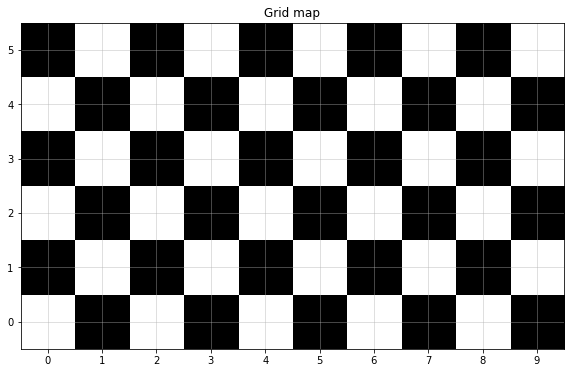

In [8]:
%matplotlib inline
from viz_utilis import plot_curr_map

w = 10
h = 6
plot_curr_map(w,h)

### Towards the goal

#### Test case1

- Map loading & goal setting

Path
 [(1, 0), (1, 1), (2, 1), (2, 2), (3, 2)]
Control guide
 [(0, 1), (1, 0), (0, 1), (1, 0)]


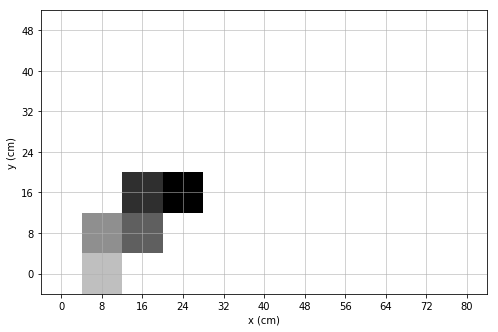

In [27]:
%matplotlib inline
from viz_utilis import plotPathSW

start=(1,0)
goal=(3,2)
global_map = np.zeros((10,6))
path, control_guide = A_Star_4_direction(start, goal, global_map, len(global_map), len(global_map[0]))
print("Path\n", path)
print("Control guide\n", control_guide)
experi_name = "test1"
np.save(experi_name+'_optimalpath_global.npy',path)
np.save(experi_name+'_control_guide.npy',control_guide)

#plotPathSW(path, w, h)
plotPathSW(path, w, h, experi_name, True)

state_orient=0 #initial orientation
desired_orient=pi/2 # desired orientation
init_desired_orient = copy.deepcopy(desired_orient) # remember desired state

- Move towards goal

In [9]:
## Parameters
# final goal
x_goal=goal[0]*unit_dis
y_goal=goal[1]*unit_dis

EVAL=0.5
h_v_flag=0
# parameters from Kalman Filters
qp = 0.0004 # variance on position state
rp = 0.0025 # variance on position measurement
r_nu=0.0615
q_nu=0.0615
Q= np.array([[qp, 0], [0, q_nu]])
#the detailed parameters needs to be measured in practice.
x_pos_last_trans=0;
y_pos_last_trans=0;
x_est_prev=np.array([0,0])
y_est_prev=np.array([0,0])
Px_est_prev=Q
Py_est_prev=Q;

# recording parameters
iter_com=0
bingo=0
x_pos_record= []
y_pos_record=[]
x_pos_est= []
y_pos_est=[]
inner_iter=0

## Action
# calibrate init angle; # state_orient: initial orientation; # desired_orient: desired orientation
orient_calibrate(state_orient,desired_orient)

while bingo==0:
    if inner_iter<3:
        g_sens_prev=th["prox.ground.reflected"]
        g_sens_prev=sum(g_sens_prev)/len(g_sens_prev)
        run_flag=global_controller(iter_com,inner_iter)
        if run_flag==0:
            break
        
        speed=250

        Ts=1/3
        g_sens=th["prox.ground.reflected"]
        g_sens=sum(g_sens)/len(g_sens)


        x_pos_last_trans, y_pos_last_trans, x_est, y_est, Px_est, Py_est= kalman_filter(speed, g_sens_prev, g_sens, x_pos_last_trans, y_pos_last_trans, x_est_prev, y_est_prev, 
                      Px_est_prev, Py_est_prev, Q, h_v_flag,Ts)
        x_est_prev=x_est 
        y_est_prev=y_est
        Px_est_prev=Px_est
        Py_est_prev=Py_est
        x_pos_est.append(x_est)
        y_pos_est.append(y_est)
        x_pos_record.append(x_pos_last_trans)
        y_pos_record.append(y_pos_last_trans)
        print('iter',iter_com)
        inner_iter=inner_iter+1
    if inner_iter==3:
        iter_com+=1
        inner_iter=0
    print('x_est',x_est)
    print('y_est',y_est)
    #print('pos_trans',x_pos_last_trans)
    bingo=abs(x_goal-x_est[0])<EVAL and abs(y_goal-y_est[0])<EVAL

calibrated degree 90.0
iter 0
x_est [0.9375 5.625 ]
y_est [0.     8.4375]
iter 0
x_est [3.1640625 7.3828125]
y_est [0.     8.4375]
iter 0
x_est [7.74529604 8.83136095]
y_est [0.     8.4375]
iter 1
x_est [7.74529604 8.4375    ]
y_est [2.8125 8.4375]
iter 1
x_est [7.74529604 8.4375    ]
y_est [5.625  8.4375]
iter 1
x_est [7.74529604 8.4375    ]
y_est [8.04972308 8.28217456]
iter 2
x_est [10.55779604  8.4375    ]
y_est [8.04972308 8.4375    ]
iter 2
x_est [13.37029604  8.4375    ]
y_est [8.04972308 8.4375    ]
iter 2
x_est [16.02142736  8.37418514]
y_est [8.04972308 8.4375    ]
iter 3
x_est [16.02142736  8.4375    ]
y_est [10.86222308  8.4375    ]
iter 3
x_est [16.02142736  8.4375    ]
y_est [13.67472308  8.4375    ]
iter 3
x_est [16.02142736  8.4375    ]
y_est [16.05711231  8.26874109]


- Result ploting

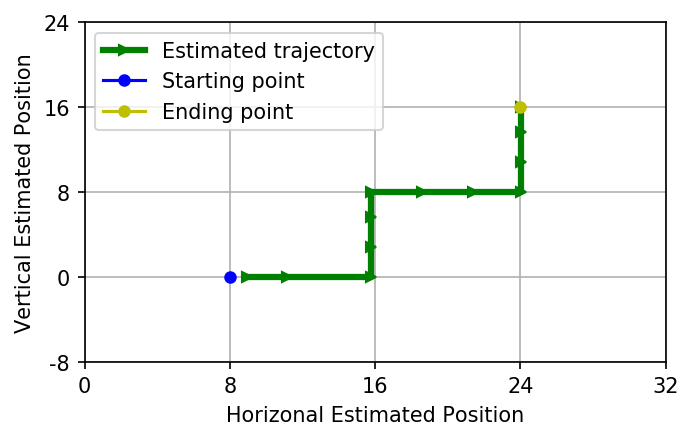

In [10]:
%matplotlib qt5
from viz_utilis import plot_est_result_xy
plot_est_result_xy(x_pos_est, y_pos_est, start, goal, init_state_orient)

#### Test case2 

Path
 [(1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)]
Control guide
 [(0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (0, 1), (1, 0)]


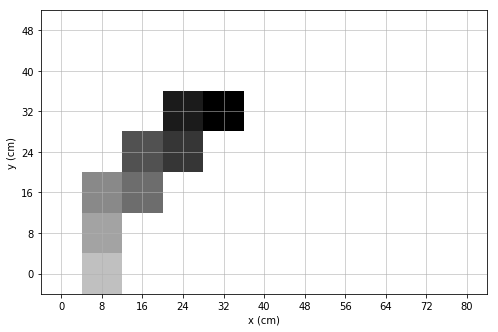

In [31]:
%matplotlib inline
from viz_utilis import plotPathSW

start=(1,0)
goal=(4,4)
global_map = np.zeros((10,6))
path, control_guide = A_Star_4_direction(start, goal, global_map, len(global_map), len(global_map[0]))
print("Path\n", path)
print("Control guide\n", control_guide)
experi_name = "test2"
np.save("./npy/"+experi_name+'_optimalpath_global.npy',path)
np.save("./npy/"+experi_name+'_control_guide.npy',control_guide)

#plotPathSW(path, w, h)
plotPathSW(path, w, h, experi_name, True)

state_orient=pi/2 #initial orientation
desired_orient=pi/2 # desired orientation
init_desired_orient = copy.deepcopy(desired_orient) # remember desired state

In [11]:
## Parameters
# final goal
x_goal=goal[0]*unit_dis
y_goal=goal[1]*unit_dis

EVAL=0.5
h_v_flag=0
# parameters from Kalman Filters
qp = 0.0004 # variance on position state
rp = 0.0025 # variance on position measurement
r_nu=0.0615
q_nu=0.0615
Q= np.array([[qp, 0], [0, q_nu]])
#the detailed parameters needs to be measured in practice.
x_pos_last_trans=0;
y_pos_last_trans=0;
x_est_prev=np.array([0,0])
y_est_prev=np.array([0,0])
Px_est_prev=Q
Py_est_prev=Q;

# recording parameters
iter_com=0
bingo=0
x_pos_record= []
y_pos_record=[]
x_pos_est= []
y_pos_est=[]
inner_iter=0

## Action
# calibrate init angle; # state_orient: initial orientation; # desired_orient: desired orientation
orient_calibrate(state_orient,desired_orient)

while bingo==0:
    if inner_iter<3:
        g_sens_prev=th["prox.ground.reflected"]
        g_sens_prev=sum(g_sens_prev)/len(g_sens_prev)
        run_flag=global_controller(iter_com,inner_iter)
        if run_flag==0:
            break
        
        speed=250

        Ts=1/3
        g_sens=th["prox.ground.reflected"]
        g_sens=sum(g_sens)/len(g_sens)


        x_pos_last_trans, y_pos_last_trans, x_est, y_est, Px_est, Py_est= kalman_filter(speed, g_sens_prev, g_sens, x_pos_last_trans, y_pos_last_trans, x_est_prev, y_est_prev, 
                      Px_est_prev, Py_est_prev, Q, h_v_flag,Ts)
        x_est_prev=x_est 
        y_est_prev=y_est
        Px_est_prev=Px_est
        Py_est_prev=Py_est
        x_pos_est.append(x_est)
        y_pos_est.append(y_est)
        x_pos_record.append(x_pos_last_trans)
        y_pos_record.append(y_pos_last_trans)
        print('iter',iter_com)
        inner_iter=inner_iter+1
    if inner_iter==3:
        iter_com+=1
        inner_iter=0
    print('x_est',x_est)
    print('y_est',y_est)
    #print('pos_trans',x_pos_last_trans)
    bingo=abs(x_goal-x_est[0])<EVAL and abs(y_goal-y_est[0])<EVAL

calibrated degree 0.0
iter 0
x_est [0.9375 5.625 ]
y_est [0.     8.4375]
iter 0
x_est [3.1640625 7.3828125]
y_est [0.     8.4375]
iter 0
x_est [7.74529604 8.83136095]
y_est [0.     8.4375]
iter 1
x_est [10.65759917  8.59051724]
y_est [0.     8.4375]
iter 1
x_est [13.5044779   8.49609375]
y_est [0.     8.4375]
iter 1
x_est [16.03862062  8.34577047]
y_est [0.     8.4375]
iter 2
x_est [16.03862062  8.4375    ]
y_est [2.8125 8.4375]
iter 2
x_est [16.03862062  8.4375    ]
y_est [7.59893048 9.67078877]
iter 2
x_est [16.03862062  8.4375    ]
y_est [10.7224192   8.91923648]
iter 3
x_est [18.85112062  8.4375    ]
y_est [10.7224192  8.4375   ]
iter 3
x_est [21.66362062  8.4375    ]
y_est [10.7224192  8.4375   ]
iter 3
x_est [24.05582454  8.2725062 ]
y_est [10.7224192  8.4375   ]
iter 4
x_est [24.05582454  8.4375    ]
y_est [13.5349192  8.4375   ]
iter 4
x_est [24.05582454  8.4375    ]
y_est [16.0406304   8.31735649]
iter 4
x_est [24.05582454  8.4375    ]
y_est [18.82269633  8.39086553]
iter 5
x_

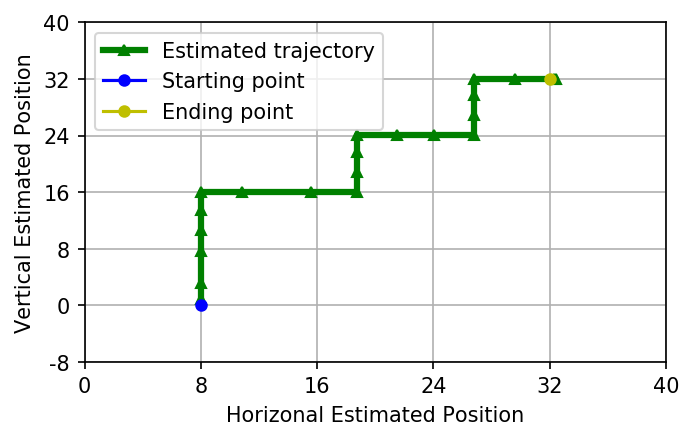

In [13]:
%matplotlib inline
plot_est_result_xy(x_pos_est, y_pos_est, start, goal, init_desired_orient)

#### Test case3

Path
 [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (6, 3), (7, 3)]
Control guide
 [(1, 0), (1, 0), (1, 0), (1, 0), (0, 1), (1, 0), (0, 1), (1, 0)]


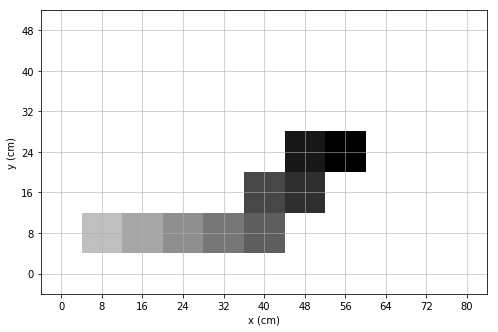

In [29]:
%matplotlib inline
from viz_utilis import plotPathSW

start=(1,1)
goal=(7,3)
global_map = np.zeros((10,6))
path, control_guide = A_Star_4_direction(start, goal, global_map, len(global_map), len(global_map[0]))
print("Path\n", path)
print("Control guide\n", control_guide)
experi_name = "test3"
np.save("./npy/"+experi_name+'_optimalpath_global.npy',path)
np.save("./npy/"+experi_name+'_control_guide.npy',control_guide)

#plotPathSW(path, w, h)
plotPathSW(path, w, h, experi_name, True)

state_orient=pi/2 #initial orientation
desired_orient=0 # desired orientation
init_desired_orient = copy.deepcopy(desired_orient) # remember desired state

In [19]:
## Parameters
# final goal
x_goal=goal[0]*unit_dis
y_goal=goal[1]*unit_dis

EVAL=0.5
h_v_flag=0
# parameters from Kalman Filters
qp = 0.0004 # variance on position state
rp = 0.0025 # variance on position measurement
r_nu=0.0615
q_nu=0.0615
Q= np.array([[qp, 0], [0, q_nu]])
#the detailed parameters needs to be measured in practice.
x_pos_last_trans=0;
y_pos_last_trans=0;
x_est_prev=np.array([0,0])
y_est_prev=np.array([0,0])
Px_est_prev=Q
Py_est_prev=Q;

# recording parameters
iter_com=0
bingo=0
x_pos_record= []
y_pos_record=[]
x_pos_est= []
y_pos_est=[]
inner_iter=0

## Action
# calibrate init angle; # state_orient: initial orientation; # desired_orient: desired orientation
orient_calibrate(state_orient,desired_orient)

while bingo==0:
    if inner_iter<3:
        g_sens_prev=th["prox.ground.reflected"]
        g_sens_prev=sum(g_sens_prev)/len(g_sens_prev)
        run_flag=global_controller(iter_com,inner_iter)
        if run_flag==0:
            break
        
        speed=250

        Ts=1/3
        g_sens=th["prox.ground.reflected"]
        g_sens=sum(g_sens)/len(g_sens)


        x_pos_last_trans, y_pos_last_trans, x_est, y_est, Px_est, Py_est= kalman_filter(speed, g_sens_prev, g_sens, x_pos_last_trans, y_pos_last_trans, x_est_prev, y_est_prev, 
                      Px_est_prev, Py_est_prev, Q, h_v_flag,Ts)
        x_est_prev=x_est 
        y_est_prev=y_est
        Px_est_prev=Px_est
        Py_est_prev=Py_est
        x_pos_est.append(x_est)
        y_pos_est.append(y_est)
        x_pos_record.append(x_pos_last_trans)
        y_pos_record.append(y_pos_last_trans)
        print('iter',iter_com)
        inner_iter=inner_iter+1
    if inner_iter==3:
        iter_com+=1
        inner_iter=0
    print('x_est',x_est)
    print('y_est',y_est)
    #print('pos_trans',x_pos_last_trans)
    bingo=abs(x_goal-x_est[0])<EVAL and abs(y_goal-y_est[0])<EVAL

calibrated degree -90.0
iter 0
x_est [0.9375 5.625 ]
y_est [0.     8.4375]
iter 0
x_est [3.1640625 7.3828125]
y_est [0.     8.4375]
iter 0
x_est [7.74529604 8.83136095]
y_est [0.     8.4375]
iter 1
x_est [10.65759917  8.59051724]
y_est [0.     8.4375]
iter 1
x_est [13.5044779   8.49609375]
y_est [0.     8.4375]
iter 1
x_est [16.03862062  8.34577047]
y_est [0.     8.4375]
iter 2
x_est [18.82788508  8.40189472]
y_est [0.     8.4375]
iter 2
x_est [21.6323879   8.42386777]
y_est [0.     8.4375]
iter 2
x_est [24.05182179  8.27912778]
y_est [0.     8.4375]
iter 3
x_est [26.82420541  8.37602647]
y_est [0.     8.4375]
iter 3
x_est [29.62289803  8.41396353]
y_est [0.     8.4375]
iter 3
x_est [32.05046144  8.27936414]
y_est [0.     8.4375]
iter 4
x_est [32.05046144  8.4375    ]
y_est [2.8125 8.4375]
iter 4
x_est [32.05046144  8.4375    ]
y_est [5.625  8.4375]
iter 4
x_est [32.05046144  8.4375    ]
y_est [8.04972308 8.28217456]
iter 5
x_est [34.86296144  8.4375    ]
y_est [8.04972308 8.4375    ]


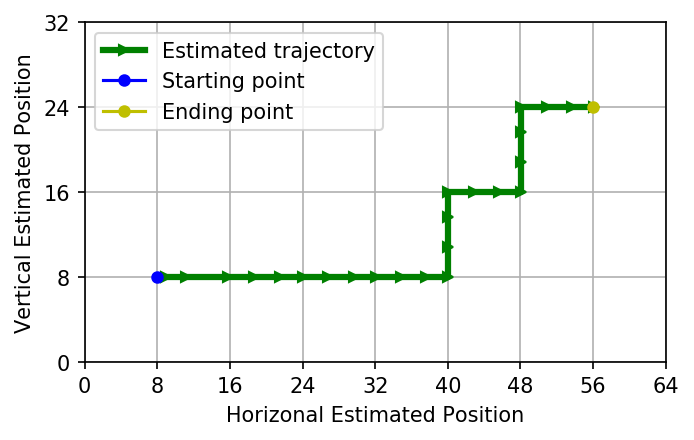

In [30]:
%matplotlib inline
plot_est_result_xy(x_pos_est, y_pos_est, start, goal, init_desired_orient)
np.save("./npy/x_pos_est_test3.npy", x_pos_est)
np.save("./npy/y_pos_est_test3.npy", y_pos_est)

## IV. Reference

[1]    M. Ben-Ari and F. Mondada, *Elements of robotics*. Springer Nature, 2017.

[2]    R. C. Gonzalez and R. E. Woods, *Digital Image Processing (4th Edition)*. Pearson, 2017.

[3]    R. Siegwart, I. R. Nourbakhsh, and D. Scaramuzza, *Introduction to autonomous mobile robots*. MIT press, 2011.

**Acknowledgment**

The overall structure of the notebook borrows from the [GitHub Repo](https://github.com/gomandr/thymio-autonomous-navigation).